Функция плотности вероятности некоторой случайной величины
 $$ \varphi(x) = \frac{1}{2} \cos x, \quad x \in [-\frac{\pi}{2}, \frac{\pi}{2}], $$

Функция распределения


$$ F(x)=\int_{-\infty}^{x}{\varphi(x) dx}=\int_{-\infty}^{x}{0 dx}=0, \quad x \in [-\infty, -\frac{\pi}{2}) $$
$$ F(x)=\int_{-\infty}^{x}{\varphi(x) dx}=\int_{-\infty}^{-\frac{\pi}{2}}{0 dx}+\int_{-\frac{\pi}{2}}^{x}{ \frac{1}{2}\cos x dx}=\int_{-\frac{\pi}{2}}^{x}{ \frac{1}{2}\cos x dx}= \frac{1}{2}\sin x \Bigg|_{-\frac{\pi}{2}}^x=\frac{\sin x + 1}{2}, \quad x \in [-\frac{\pi}{2}, \frac{\pi}{2}], $$
$$ F(x)=\int_{-\infty}^{x}{\varphi(x) dx}=\int_{-\infty}^{-\frac{\pi}{2}}{0 dx}+\int_{-\frac{\pi}{2}}^{\frac{\pi}{2}}{ \frac{1}{2}\cos x dx}+\int_{\frac{\pi}{2}}^{x}{0 dx}=\int_{0}^{\pi}{\frac{1}{2}\cos x dx}=\frac{1}{2}\sin x \Bigg|_{-\frac{\pi}{2}}^\frac{\pi}{2}=1, \quad x \in (\frac{\pi}{2}, +\infty] $$

$$ F(x)=\begin{cases} 0, & x \in [-\infty, -\frac{\pi}{2}), \\ \frac{\sin x + 1}{2}, & x \in [-\frac{\pi}{2}, \frac{\pi}{2}], \\ 1, & x \in (\frac{\pi}{2}, +\infty]. \end{cases} $$

Квантильная функция:

$$F(x_q)=\frac{\sin x_q + 1}{2}=q$$
$$\sin x_q + 1=2q$$
$$\sin(x_q)=2q-1$$
$$x_q=arcsin(2q-1)$$

##Класс для распределения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

In [5]:
class CustomDistribution(rv_continuous):
    def __init__(self, a, b):
        super().__init__(a=a, b=b, name='custom_dist')

    def _pdf(self, x):
        result = np.zeros_like(x)
        result[(x >= self.a) & (x <= self.b)] = 1 / 2 * np.cos(x)
        return result

    def _cdf(self, x):
        result = np.zeros_like(x)
        result[x < self.a] = 0
        result[(x >= self.a) & (x <= self.b)] = (np.sin(x)+1)/2
        result[x > self.b] = 1
        return result

    def _ppf(self, q):
        return np.arcsin(2 * q - 1)


a, b = -np.pi/2, np.pi/2
custom_dist = CustomDistribution(a, b)

np.random.seed(1)
sample = custom_dist.rvs(size=10_000)

print(f"Размер выборки: {len(sample)}")
values = ', '.join(f"{x:.3f}" for x in sample[:10])
print(f"Первые 10 значений: {values}")

x_test = np.linspace(a - 0.5, b + 0.5, 100)
pdf_values = custom_dist.pdf(x_test)
cdf_values = custom_dist.cdf(x_test)

Размер выборки: 10000
Первые 10 значений: -0.167, 0.456, -1.549, -0.406, -0.785, -0.953, -0.678, -0.314, -0.208, 0.078


Условие нормировки плотности:

In [6]:
print("Проверка нормировки плотности:")
integral, error = integrate.quad(custom_dist.pdf, a, b)
print(f"∫f(x)dx на [{a}, {b}] = {integral:.3f} (ошибка: {error:.2e})")

Проверка нормировки плотности:
∫f(x)dx на [-1.5707963267948966, 1.5707963267948966] = 1.000 (ошибка: 1.11e-14)


Графики плотности и функции распределения:

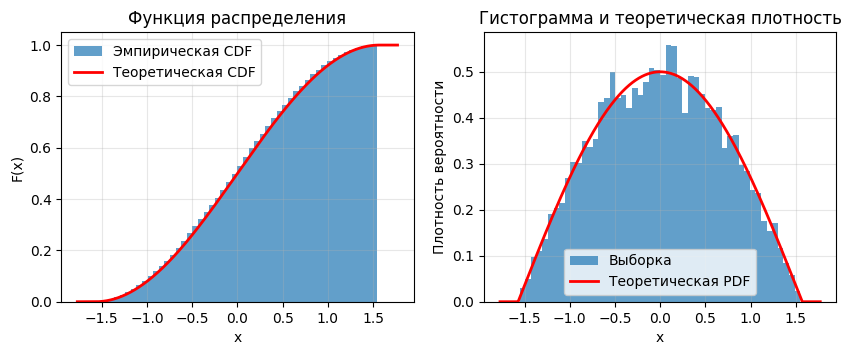

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
x_plot = np.linspace(a - 0.2, b + 0.2, 1000)

ax1.hist(sample, bins=50, density=True, cumulative=True, alpha=0.7, label='Эмпирическая CDF')
ax1.plot(x_plot, custom_dist.cdf(x_plot), 'r-', linewidth=2, label='Теоретическая CDF')
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title('Функция распределения')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(sample, bins=50, density=True, alpha=0.7, label='Выборка')
ax2.plot(x_plot, custom_dist.pdf(x_plot), 'r-', linewidth=2, label='Теоретическая PDF')
ax2.set_xlabel('x')
ax2.set_ylabel('Плотность вероятности')
ax2.set_title('Гистограмма и теоретическая плотность')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.show()

Рассчитаем вероятность попадания СВ в интервал $\left[-\frac{\pi}{3};\frac{\pi}{4}\right]$:

$$P(-\frac{\pi}{3} \leq X \leq \frac{\pi}{4})=F(\frac{\pi}{4})-F(-\frac{\pi}{3})$$

In [9]:
print("Вероятность попадания СВ в интервал [-pi/3; pi/4]:")
print(custom_dist.cdf(np.pi / 4) - custom_dist.cdf(- np.pi / 3))

Вероятность попадания СВ в интервал [-pi/3; pi/4]:
0.786566092485493


In [13]:
print(f"Математическое ожидание: {custom_dist.mean()}")
print(f"Дисперсия: {custom_dist.var()}")
print(f"Среднее квадратическое отклонение: {custom_dist.std()}")

Математическое ожидание: 1.839248805930514e-18
Дисперсия: 0.4674
Среднее квадратическое отклонение: 0.6837


In [14]:
print(f"Квантиль уровня 0.35: {custom_dist.ppf(0.35)}")
print(f"53%-ная точка: {custom_dist.ppf(0.47)}")

Квантиль уровня 0.35: -0.3046926540153976
53%-ная точка: -0.06003605844527848


In [15]:
mean = custom_dist.mean()

def integrand3(x):
    return (x - mean) ** 3 * custom_dist.pdf(x)

mu3, error = integrate.quad(integrand3, -np.inf, np.inf)
print(f"Третий центральный момент: {mu3}")
A = mu3 / (custom_dist.std()) ** 3
print(f"Коэффициент асимметрии: {A}")

Третий центральный момент: -1.3844970261125675e-23
Коэффициент асимметрии: -4.332688152913379e-23


In [16]:
def integrand4(x):
    return (x - mean) ** 4 * custom_dist.pdf(x)

mu4, error = integrate.quad(integrand4, -np.inf, np.inf)
print(f"Четвёртый центральный момент: {mu4:.4f}")

E = (mu4 / (custom_dist.std()) ** 4) - 3
print(f"Эксцесс: {E:.4f}")

Четвёртый центральный момент: 0.4793
Эксцесс: -0.8062
